# Initialisation

In [1]:
# Import libraries and dependencies
import ccxt
import os
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import talib as ta

from Utility_Functions import Functions

### Import Environment Variables

In [2]:
# Load environment variables
load_dotenv()

# Import environment variables
kraken_public_key = os.getenv("KRAKEN_PUBLIC_KEY")
kraken_secret_key = os.getenv("KRAKEN_SECRET_KEY")

# Verify that environment variables were loaded
print(f"Kraken key data type: {type(kraken_public_key)}")
print(f"Kraken secren data type: {type(kraken_secret_key)}")

Kraken key data type: <class 'str'>
Kraken secren data type: <class 'str'>


### Set Public and private keys and initialise the CCXT Exchange object

In [3]:
# Set the public and private keys for the API
exchange = ccxt.kraken({
    'apiKey': kraken_public_key,
    'secret': kraken_secret_key,
})

if not exchange.has['fetchOHLCV']:
    print('Cant load history data with this exchange. Try with a different exchange')

# Fetching the price data

In [4]:
currs_list = ['ETH/AUD', 'XRP/AUD' , 'LTC/AUD', 'ADA/AUD', 'XLM/AUD', 'BCH/AUD']     #

dict_ohlcv = {}

for curr in currs_list:
    
    # Call data fetch
    ohlcv = exchange.fetchOHLCV(curr, '1h')

    # Store the values in a dataframe
    df_ohlcv = pd.DataFrame(ohlcv, columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume']).set_index('Date')
    df_ohlcv.index = pd.to_datetime(df_ohlcv.index, unit='ms')

    df_ohlcv.dropna(inplace=True)

    # Store the symbol name and history data in a dict 
    dict_ohlcv[curr] = df_ohlcv 

    start_date = df_ohlcv.index[0].date().isoformat()
    end_date = df_ohlcv.index[-1].date().isoformat()
    num_records = (len(df_ohlcv))
    start_price = df_ohlcv.iloc[0]['Close']
    end_price = df_ohlcv.iloc[-1]['Close']

    print(f'Data summary for {curr}')
    print(f'    Start Date: {start_date}; End Date: {end_date}; NUmber of records: {num_records}')
    print(f'    Start Price: {start_price}; End Price: {end_price}')    
    print(f'Data for {curr} fetched and appended into the dictionary\n')

Data summary for ETH/AUD
    Start Date: 2021-07-29; End Date: 2021-08-28; NUmber of records: 720
    Start Price: 3110.78; End Price: 4453.06
Data for ETH/AUD fetched and appended into the dictionary

Data summary for XRP/AUD
    Start Date: 2021-07-29; End Date: 2021-08-28; NUmber of records: 720
    Start Price: 0.94915; End Price: 1.611
Data for XRP/AUD fetched and appended into the dictionary

Data summary for LTC/AUD
    Start Date: 2021-07-29; End Date: 2021-08-28; NUmber of records: 720
    Start Price: 186.86; End Price: 240.18
Data for LTC/AUD fetched and appended into the dictionary

Data summary for ADA/AUD
    Start Date: 2021-07-29; End Date: 2021-08-28; NUmber of records: 720
    Start Price: 1.7407; End Price: 3.93684
Data for ADA/AUD fetched and appended into the dictionary

Data summary for XLM/AUD
    Start Date: 2021-07-29; End Date: 2021-08-28; NUmber of records: 720
    Start Price: 0.3656; End Price: 0.48238
Data for XLM/AUD fetched and appended into the dictiona

# Computing and adding Technical Indicators to the price data

In [5]:
fast_window = 5
slow_window = 15

df_all_data = pd.DataFrame() 
for curr, data in dict_ohlcv.items():

    df = Functions.add_tech_indicators(data, fast_window, slow_window)
    
    df['Currency'] = curr 
    df['Returns'] = df['Close'].pct_change()

    df.dropna(inplace=True)    
    df_all_data = df_all_data.append(df)

df_all_data.shape

(4216, 17)

In [6]:
df_all_data

,Open,High,Low,Close,Volume,SMA_agg,RSI_ratio,CCI,MACD_ratio,ADX,ADX_dirn,ATR_ratio,BBands_high,BBands_low,SMA_vol_agg,Currency,Returns
Date,,,,,,,,,,,,,,,,,
2021-07-30 02:00:00,3311.76,3311.76,3286.35,3286.35,1.252975,1.023521,1.022101,87.143590,1.623762,65.634756,1.0,1.448620,1.002131,1.029719,1.471938,ETH/AUD,-0.005643
2021-07-30 03:00:00,3284.09,3284.09,3281.31,3281.31,0.613744,1.027185,0.996889,41.185370,1.337463,68.393673,1.0,1.269047,1.005115,1.014386,1.594175,ETH/AUD,-0.001534
2021-07-30 04:00:00,3277.49,3293.08,3273.05,3273.05,8.261515,1.026842,0.946504,14.600211,1.144810,70.995063,1.0,1.206632,1.007760,1.005269,1.065820,ETH/AUD,-0.002517
2021-07-30 05:00:00,3275.09,3275.09,3260.00,3263.21,0.144574,1.025731,0.879248,-139.976174,0.997083,67.702097,1.0,1.128182,1.009985,0.998603,1.215940,ETH/AUD,-0.003006
2021-07-30 06:00:00,3257.28,3263.58,3246.69,3248.34,0.515941,1.020048,0.777198,-118.521750,0.857899,60.158308,1.0,1.077193,1.010980,0.997373,1.129711,ETH/AUD,-0.004557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-28 06:00:00,870.56,870.56,870.56,870.56,0.000000,1.018143,0.899227,-83.333333,0.889662,72.262799,1.0,1.154778,1.007249,0.999268,0.158666,BCH/AUD,0.000000
2021-08-28 07:00:00,868.01,868.50,868.01,868.50,1.109246,1.014227,0.800311,-87.076103,0.784316,58.308044,1.0,1.139977,1.008319,0.999191,0.681757,BCH/AUD,-0.002366
2021-08-28 08:00:00,868.50,868.50,868.50,868.50,0.000000,1.010327,0.800311,-71.703308,0.717053,47.144241,1.0,0.977124,1.006072,1.000559,0.681757,BCH/AUD,0.000000


<AxesSubplot:xlabel='Date'>

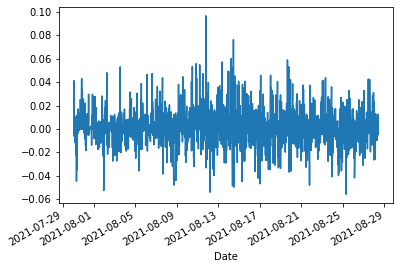

In [7]:
df_all_data.Returns.plot()

In [8]:
df_all_data.to_csv('Resources/Testing_data.csv')